# Forecast SP500 stocks

## Import Dependencies

In [1]:
pip install --upgrade mplfinance

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load Data From API

In [4]:
import yfinance as yf

In [5]:
voo = yf.Ticker("VOO")

voo.info

{'phone': '800-523-1036',
 'longBusinessSummary': "The fund employs an indexing investment approach designed to track the performance of the Standard & Poor's 500 Index, a widely recognized benchmark of U.S. stock market performance that is dominated by the stocks of large U.S. companies. The advisor attempts to replicate the target index by investing all, or substantially all, of its assets in the stocks that make up the index, holding each stock in approximately the same proportion as its weighting in the index.",
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 392.02,
 'open': 391.96,
 'dayLow': 391.29,
 'dayHigh': 394.35,
 'regularMarketPreviousClose': 392.02,
 'regularMarketOpen': 391.96,
 'regularMarketDayLow': 391.29,
 'regularMarketDayHigh': 394.35,
 'trailingPE': 21.45455,
 'volume': 1297330,
 'regularMarketVolume': 1297330,
 'averageVolume': 3705677,
 'averageVolume10days': 3938690,
 'averageDailyVolume10Day': 3938690,
 'bid': 393.86,
 'ask': 393.88,
 'bidSize': 800,
 'a

In [31]:
# Let's visualize the VOO stocks for the past 3 years
data = voo.history(period='10Y')
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2013-06-10 00:00:00-04:00,126.171708,126.171708,125.405303,125.688545,1841250,0.0,0.0,0.0
2013-06-11 00:00:00-04:00,124.555669,125.521982,124.105822,124.405716,1502800,0.0,0.0,0.0
2013-06-12 00:00:00-04:00,125.305360,125.388669,123.289413,123.439354,1058300,0.0,0.0,0.0
2013-06-13 00:00:00-04:00,123.306067,125.455303,123.056154,125.222054,1280150,0.0,0.0,0.0
2013-06-14 00:00:00-04:00,125.105418,125.605245,124.255730,124.455650,1172650,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-06-02 00:00:00-04:00,390.079987,393.959991,389.540009,393.260010,7365800,0.0,0.0,0.0
2023-06-05 00:00:00-04:00,393.540009,394.769989,391.790009,392.500000,3481200,0.0,0.0,0.0
2023-06-06 00:00:00-04:00,392.049988,393.790009,391.410004,393.309998,2894700,0.0,0.0,0.0


In [7]:
import mplfinance as mpf

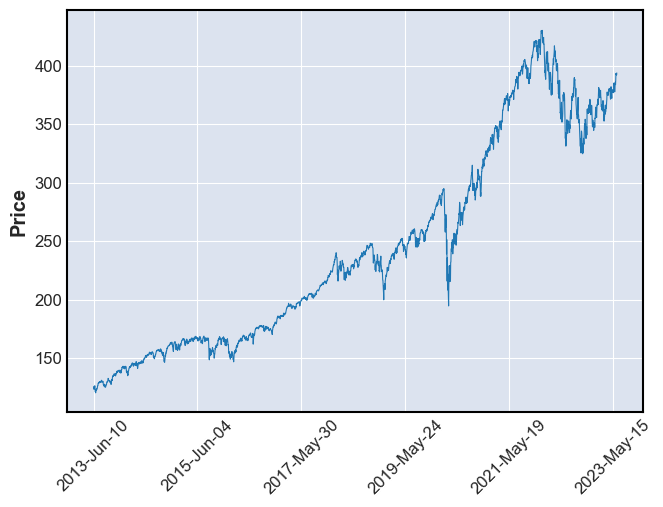

In [8]:
# visualize voo stocks overtime
mpf.plot(df, type='line')

## Preprocessing AND Partition

## Create Dates

In [9]:
df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

In [10]:
df.index

DatetimeIndex(['2013-06-10 00:00:00-04:00', '2013-06-11 00:00:00-04:00',
               '2013-06-12 00:00:00-04:00', '2013-06-13 00:00:00-04:00',
               '2013-06-14 00:00:00-04:00', '2013-06-17 00:00:00-04:00',
               '2013-06-18 00:00:00-04:00', '2013-06-19 00:00:00-04:00',
               '2013-06-20 00:00:00-04:00', '2013-06-21 00:00:00-04:00',
               ...
               '2023-05-25 00:00:00-04:00', '2023-05-26 00:00:00-04:00',
               '2023-05-30 00:00:00-04:00', '2023-05-31 00:00:00-04:00',
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00',
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2518, freq=None)

In [11]:
df.index = df.index.date

In [12]:
df['datetime'] = df.index
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,datetime
2013-06-10,126.171739,126.171739,125.405334,125.688576,1841250,0.0,0.0,0.0,2013-06-10
2013-06-11,124.555600,125.521913,124.105754,124.405647,1502800,0.0,0.0,0.0,2013-06-11
2013-06-12,125.305337,125.388646,123.289391,123.439331,1058300,0.0,0.0,0.0,2013-06-12
2013-06-13,123.306090,125.455326,123.056176,125.222076,1280150,0.0,0.0,0.0,2013-06-13
2013-06-14,125.105410,125.605237,124.255722,124.455643,1172650,0.0,0.0,0.0,2013-06-14


In [13]:
df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
datetime          object
dtype: object

In [14]:
new_df = df.copy()

new_df['datetime'] = pd.to_datetime(new_df.datetime)
new_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,datetime
2013-06-10,126.171739,126.171739,125.405334,125.688576,1841250,0.0,0.0,0.0,2013-06-10
2013-06-11,124.555600,125.521913,124.105754,124.405647,1502800,0.0,0.0,0.0,2013-06-11
2013-06-12,125.305337,125.388646,123.289391,123.439331,1058300,0.0,0.0,0.0,2013-06-12
2013-06-13,123.306090,125.455326,123.056176,125.222076,1280150,0.0,0.0,0.0,2013-06-13
2013-06-14,125.105410,125.605237,124.255722,124.455643,1172650,0.0,0.0,0.0,2013-06-14


In [15]:
new_df['day'] = new_df['datetime'].dt.day
new_df['month'] = new_df['datetime'].dt.month
new_df['year'] = new_df['datetime'].dt.year
new_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,datetime,day,month,year
2013-06-10,126.171739,126.171739,125.405334,125.688576,1841250,0.0,0.0,0.0,2013-06-10,10,6,2013
2013-06-11,124.555600,125.521913,124.105754,124.405647,1502800,0.0,0.0,0.0,2013-06-11,11,6,2013
2013-06-12,125.305337,125.388646,123.289391,123.439331,1058300,0.0,0.0,0.0,2013-06-12,12,6,2013
2013-06-13,123.306090,125.455326,123.056176,125.222076,1280150,0.0,0.0,0.0,2013-06-13,13,6,2013
2013-06-14,125.105410,125.605237,124.255722,124.455643,1172650,0.0,0.0,0.0,2013-06-14,14,6,2013


In [16]:
new_df = new_df.drop(['High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains', 'day', 'month', 'year'], axis=1)
new_df.head()

,Open,datetime
2013-06-10,126.171739,2013-06-10
2013-06-11,124.555600,2013-06-11
2013-06-12,125.305337,2013-06-12
2013-06-13,123.306090,2013-06-13
2013-06-14,125.105410,2013-06-14


In [17]:
new_df.columns = ['y', 'ds']
new_df.head()

,y,ds
2013-06-10,126.171739,2013-06-10
2013-06-11,124.555600,2013-06-11
2013-06-12,125.305337,2013-06-12
2013-06-13,123.306090,2013-06-13
2013-06-14,125.105410,2013-06-14


## Visualized Data to create appropriate partitions

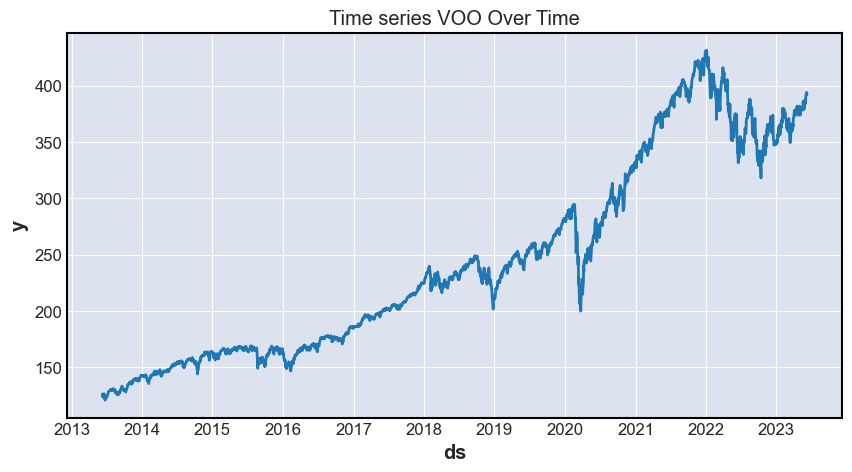

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x='ds', y='y', data=new_df).set_title('Time series VOO Over Time')
plt.show()

## Create Train and Test split

In [19]:
print(new_df['ds'].min(), new_df['ds'].max())

2013-06-10 00:00:00 2023-06-08 00:00:00


In [20]:
new_df.head()

,y,ds
2013-06-10,126.171739,2013-06-10
2013-06-11,124.555600,2013-06-11
2013-06-12,125.305337,2013-06-12
2013-06-13,123.306090,2013-06-13
2013-06-14,125.105410,2013-06-14


In [21]:
train = new_df[new_df['ds'] < '2023-01-01']
test = new_df[new_df['ds'] >= '2023-01-01']

In [22]:
train.tail()

,y,ds
2022-12-23,347.499208,2022-12-23
2022-12-27,350.317617,2022-12-27
2022-12-28,348.983122,2022-12-28
2022-12-29,347.479304,2022-12-29
2022-12-30,348.355690,2022-12-30


In [23]:
test.tail()

,y,ds
2023-06-02,390.079987,2023-06-02
2023-06-05,393.540009,2023-06-05
2023-06-06,392.049988,2023-06-06
2023-06-07,393.670013,2023-06-07
2023-06-08,391.959991,2023-06-08


## Train Model

In [24]:
from prophet import Prophet

model = Prophet()
model = model.fit(train)

12:57:04 - cmdstanpy - INFO - Chain [1] start processing
12:57:04 - cmdstanpy - INFO - Chain [1] done processing


# Evaluate Model

## Make Predictions on Test Set

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
yhat = model.predict(test[['ds']])
yhat

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,373.431221,358.033989,395.141180,373.431221,373.431221,3.114108,3.114108,3.114108,0.143739,0.143739,0.143739,2.970368,2.970368,2.970368,0.0,0.0,0.0,376.545328
1,2023-01-04,373.428787,358.418732,394.500083,373.428787,373.428787,3.040254,3.040254,3.040254,-0.095485,-0.095485,-0.095485,3.135739,3.135739,3.135739,0.0,0.0,0.0,376.469041
2,2023-01-05,373.426354,358.896804,395.008989,373.426354,373.426354,3.112185,3.112185,3.112185,-0.162104,-0.162104,-0.162104,3.274288,3.274288,3.274288,0.0,0.0,0.0,376.538538
3,2023-01-06,373.423920,358.368799,394.851184,373.423920,373.423920,3.343357,3.343357,3.343357,-0.039020,-0.039020,-0.039020,3.382376,3.382376,3.382376,0.0,0.0,0.0,376.767277
4,2023-01-09,373.416619,358.469881,395.387370,373.416619,373.416619,3.404105,3.404105,3.404105,-0.094106,-0.094106,-0.094106,3.498211,3.498211,3.498211,0.0,0.0,0.0,376.820724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2023-06-02,373.066189,353.188247,394.064051,366.478688,380.261437,-0.201839,-0.201839,-0.201839,-0.039020,-0.039020,-0.039020,-0.162820,-0.162820,-0.162820,0.0,0.0,0.0,372.864350
105,2023-06-05,373.058888,353.924960,393.319965,366.353429,380.459680,0.206977,0.206977,0.206977,-0.094106,-0.094106,-0.094106,0.301083,0.301083,0.301083,0.0,0.0,0.0,373.265865
106,2023-06-06,373.056455,353.382669,394.142320,366.164150,380.555799,0.528209,0.528209,0.528209,0.143739,0.143739,0.143739,0.384470,0.384470,0.384470,0.0,0.0,0.0,373.584664
107,2023-06-07,373.054021,352.021006,394.223596,366.027080,380.643777,0.335147,0.335147,0.335147,-0.095485,-0.095485,-0.095485,0.430632,0.430632,0.430632,0.0,0.0,0.0,373.389169


In [27]:
mean_absolute_error(test[['y']], yhat[['yhat']])

8.7422103432111

## Make New Predictions

In [28]:
future = model.make_future_dataframe(periods=500, freq='D') # daily forecast
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2904,2024-05-09,372.233917,316.736045,420.015811,318.157921,423.047040,-3.734474,-3.734474,-3.734474,-0.162104,-0.162104,-0.162104,-3.572370,-3.572370,-3.572370,0.0,0.0,0.0,368.499443
2905,2024-05-10,372.231483,312.245635,422.244920,318.036407,423.113652,-3.797644,-3.797644,-3.797644,-0.039020,-0.039020,-0.039020,-3.758625,-3.758625,-3.758625,0.0,0.0,0.0,368.433839
2906,2024-05-11,372.229049,310.301429,417.839486,317.914892,423.179909,-3.787846,-3.787846,-3.787846,0.123488,0.123488,0.123488,-3.911334,-3.911334,-3.911334,0.0,0.0,0.0,368.441204
2907,2024-05-12,372.226616,310.490342,419.236108,317.796476,423.246166,-3.904043,-3.904043,-3.904043,0.123487,0.123487,0.123487,-4.027530,-4.027530,-4.027530,0.0,0.0,0.0,368.322572
2908,2024-05-13,372.224182,309.743967,422.356793,317.680922,423.312423,-4.199002,-4.199002,-4.199002,-0.094106,-0.094106,-0.094106,-4.104896,-4.104896,-4.104896,0.0,0.0,0.0,368.025181


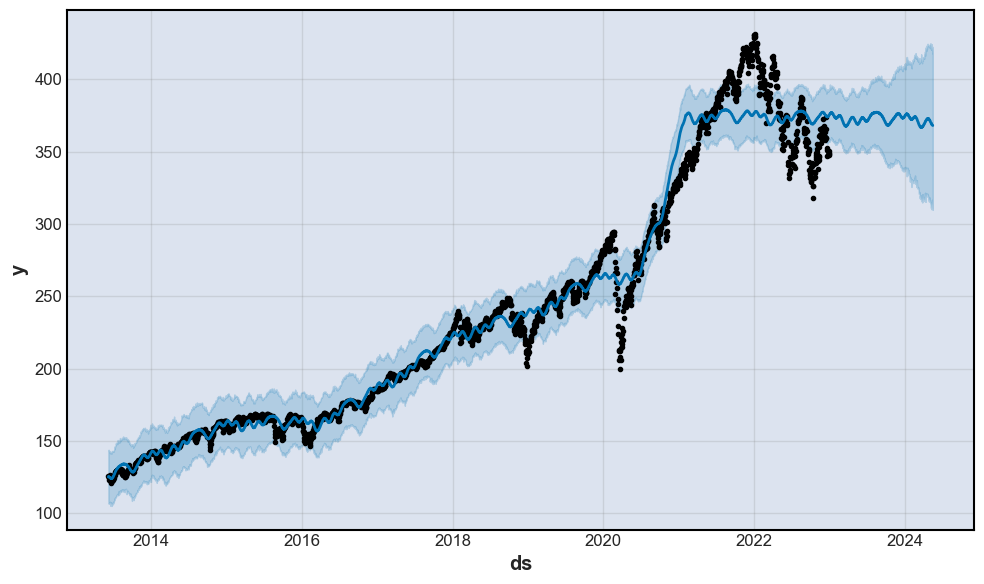

In [29]:
plot1 = model.plot(forecast)

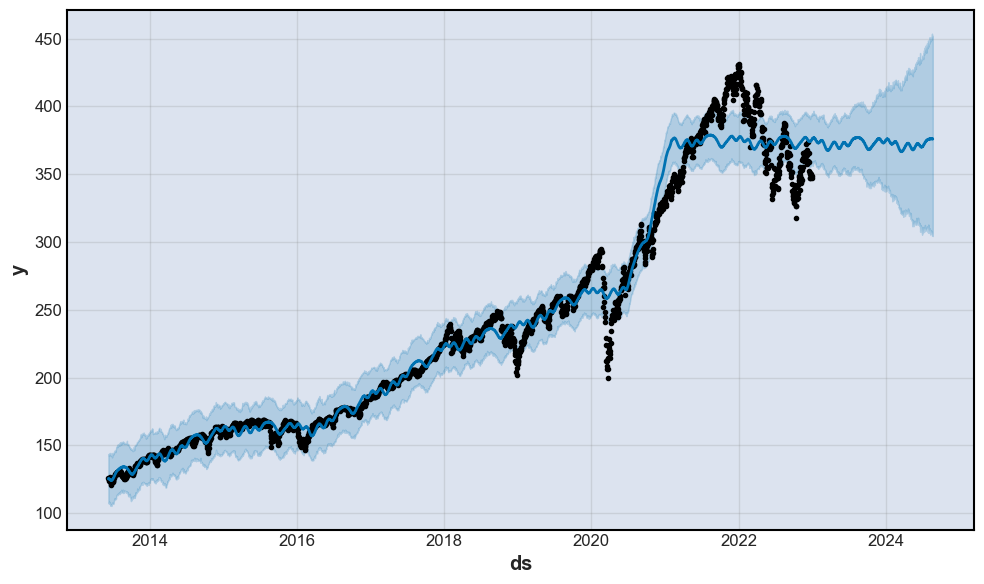

In [37]:
future = model.make_future_dataframe(periods=600, freq='D') # daily forecast
forecast = model.predict(future)
plot1 = model.plot(forecast)

In [38]:
# information to present
forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
3004,2024-08-17,304.866191,376.316593,453.759896
3005,2024-08-18,304.654697,376.296623,449.556727
3006,2024-08-19,306.780240,376.051711,451.855465
3007,2024-08-20,306.483481,376.254716,451.786075
3008,2024-08-21,304.398923,375.973039,452.193697


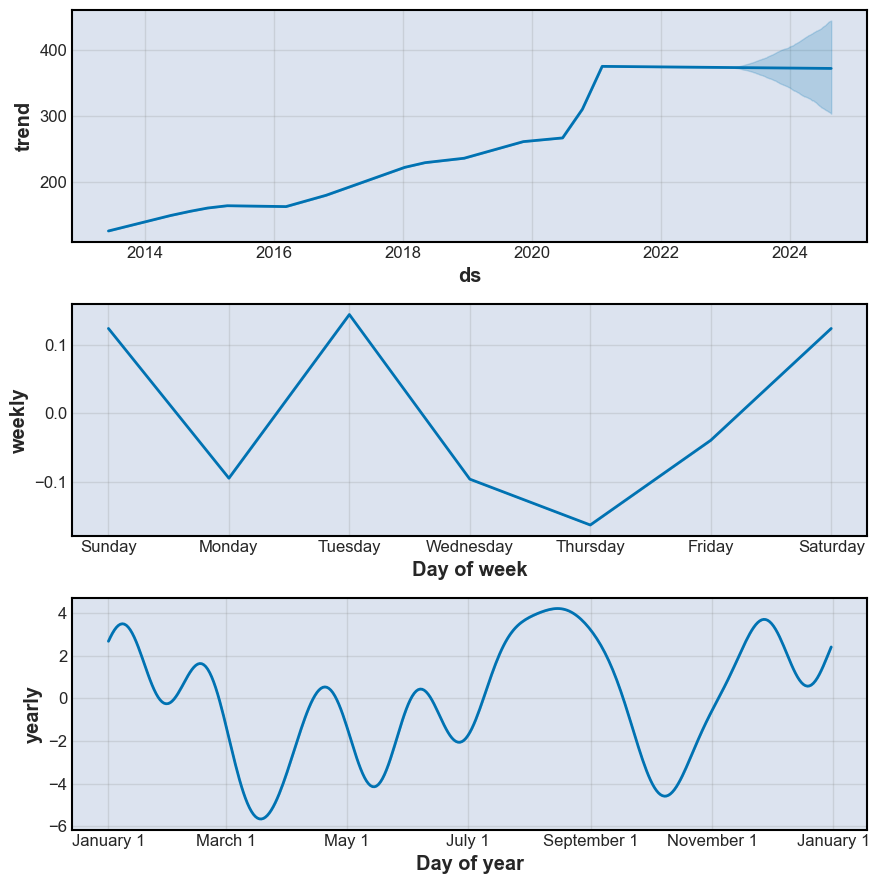

In [39]:
plot2 = model.plot_components(forecast)

In [51]:
pip list

Package               Version
--------------------- -----------
aiofiles              23.1.0
aiohttp               3.8.4
aiosignal             1.3.1
altair                5.0.1
anvil-uplink          0.4.2
anyio                 3.7.0
appdirs               1.4.4
asttokens             2.2.1
async-timeout         4.0.2
attrs                 23.1.0
backcall              0.2.0
backports.zoneinfo    0.2.1
beautifulsoup4        4.12.2
blinker               1.6.2
Bottleneck            1.3.5
cachetools            5.3.1
certifi               2023.5.7
cffi                  1.15.1
charset-normalizer    3.1.0
click                 8.1.3
cmdstanpy             1.1.0
colorama              0.4.6
comm                  0.1.3
contourpy             1.0.7
convertdate           2.4.0
cryptography          41.0.1
cycler                0.11.0
Cython                0.29.35
dacite                1.8.1
dash                  2.9.3
dash-core-components  2.0.0
dash-html-components  2.0.0
dash-table            5.0.0
d

## Save Model

In [46]:
import json
from prophet.serialize import model_to_json, model_from_json

In [47]:
with open('serailized_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)

In [48]:
with open('serailized_model.json', 'r') as fin:
    model = model_from_json(json.load(fin))

c:\Users\16178\anaconda\envs\fullstackml\lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [49]:
future = model.make_future_dataframe(periods=500, freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2904,2024-05-09,372.233917,316.085903,424.399120,322.716116,421.957138,-3.734474,-3.734474,-3.734474,-0.162104,-0.162104,-0.162104,-3.572370,-3.572370,-3.572370,0.0,0.0,0.0,368.499443
2905,2024-05-10,372.231483,315.512473,420.170529,322.467420,422.050927,-3.797644,-3.797644,-3.797644,-0.039020,-0.039020,-0.039020,-3.758625,-3.758625,-3.758625,0.0,0.0,0.0,368.433839
2906,2024-05-11,372.229049,314.536729,421.166489,322.218724,422.144715,-3.787846,-3.787846,-3.787846,0.123488,0.123488,0.123488,-3.911334,-3.911334,-3.911334,0.0,0.0,0.0,368.441204
2907,2024-05-12,372.226616,315.820531,419.664270,321.974342,422.235957,-3.904043,-3.904043,-3.904043,0.123487,0.123487,0.123487,-4.027530,-4.027530,-4.027530,0.0,0.0,0.0,368.322572
2908,2024-05-13,372.224182,316.197254,423.871278,321.741992,422.314449,-4.199002,-4.199002,-4.199002,-0.094106,-0.094106,-0.094106,-4.104896,-4.104896,-4.104896,0.0,0.0,0.0,368.025181
